# Separation of Scint.(hit_type=2) from Cher.(hit_type=1)

In [1]:
from analysis_simulation import Analysis_simulation, magnitude
from modulus_simplification import GetPMTCoord
from Chev_Scint_analysis import Chev_Scint_analysis
import uproot
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import seaborn as sn
from tqdm import tqdm

import numpy as np
from numpy import array, where, shape, reshape, pi

import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
file = uproot.open("/sno/py_out1.root")

In [3]:
#IDs = [1,2,50,31,23,11]
#IDs = np.arange(0,51)
df = Analysis_simulation(file, [11,50,20,30])
df.head()

,eventID,hitpmt ID,hit type,mc coordinates,mc radius,reconst radius,reconst error,time residual
0,11,"[2579, 8519, 8484, 8966, 8511, 8507, 8486, 897...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[3557.810791015625, -2256.099365234375, 3368.9...",5394.239748,5421.818817,48.522873,"[-10318.78351583185, 0.693626196607795, 4.4544..."
1,50,"[3101, 5526, 4806, 5302, 5200, 6218, 6237, 517...","[2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, ...","[-1761.8115234375, -815.3781127929688, -1181.5...",2272.642333,2406.404738,229.281677,"[-99.24100136131969, -65.8337323923507, 3.4813..."
2,20,"[8360, 8243, 8780, 8344, 8352, 8266, 8849, 835...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1800.2008056640625, -1955.141845703125, -4592...",5305.681847,5356.561970,112.391825,"[4.619022652213744, 15.081729435269267, -0.516..."
3,30,"[4087, 9632, 8111, 9637, 9130, 9629, 9627, 959...","[1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, ...","[4960.79345703125, -861.577880859375, 1421.911...",5231.980484,5220.358921,141.831138,"[-98.72868451792661, 6.058132894250832, 0.2099..."


In [4]:
Chev_Scint_analysis(df)

,xyz hit 1,spherical hit 1,xyz hit 2,spherical hit 2
0,"[[[6576.25, 1326.2, 5080.24], [6725.2300000000...","[[[0.9226598564133693, 0.19899608702303165, 84...","[[[2380.63, -176.29999999999998, -8059.18], [5...","[[[2.853623452336046, -0.07392108922842211, 84..."
1,"[[[6023.8099999999995, 1646.85, -5628.40000000...","[[[2.3043202399205414, 0.26686888169336476, 84...","[[[5762.7300000000005, 469.90999999999997, -60...","[[[2.382629542298147, 0.08136293367767145, 840..."
2,"[[[4815.12, 2814.96, -6283.24], [3164.94000000...","[[[2.415619630382534, 0.5290253276258652, 8401...","[[[5762.7300000000005, 469.90999999999997, -60...","[[[2.382629542298147, 0.08136293367767145, 840..."
3,"[[[6817.219999999999, 1212.37, -4767.84], [594...","[[[2.1738152130415207, 0.17599931442645309, 84...","[[[6352.75, 1209.37, -5396.18], [6712.07, 1021...","[[[2.2661865195697617, 0.18811857227807793, 84..."


In [5]:
#extarct one eventID info
evt_id_n = df.loc[df['eventID'] == 11]
evt_id_n

,eventID,hitpmt ID,hit type,mc coordinates,mc radius,reconst radius,reconst error,time residual
0,11,"[2579, 8519, 8484, 8966, 8511, 8507, 8486, 897...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[3557.810791015625, -2256.099365234375, 3368.9...",5394.239748,5421.818817,48.522873,"[-10318.78351583185, 0.693626196607795, 4.4544..."


### Extract useful variables from Analisis simulation

In [6]:
hit_type_ev = np.array(evt_id_n['hit type'])[0]
pmt_ID_ev = np.array(evt_id_n['hitpmt ID'])[0]
vertex_coord = np.array(evt_id_n['mc coordinates'])[0]
time_res = np.array(evt_id_n['time residual'])[0]
hitpmt_ID = np.array(evt_id_n['hitpmt ID'])[0]

In [7]:
vertex_coord

array([ 3557.81079102, -2256.09936523,  3368.94946289])

### Separate PMT id relative to hit_type of event

In [8]:
import itertools

condition_1 = (hit_type_ev == 1)
condition_2 = (hit_type_ev == 2)

pmtID_hit_1 = np.array([], dtype = np.int64)  #ID of PMTs detecting hit_type = 1
pmtID_hit_2 = np.array([], dtype = np.int64)  #ID of PMTs detecting hit_type = 2

time_res_hit_1 = np.array([])                 #Time residuals of hit type = 1
hitpmt_ID_hit_1 = np.array([], dtype = np.int64)  #ID of PMTS that recorded hit_type = 1

for (i,j) in zip(where(condition_1), where(condition_2)):
    pmtID_hit_1 = np.append(pmtID_hit_1, pmt_ID_ev[i])
    pmtID_hit_2 = np.append(pmtID_hit_2, pmt_ID_ev[j])
    
    time_res_hit_1 = np.append(time_res_hit_1, time_res[i])
    hitpmt_ID_hit_1 = np.append(hitpmt_ID_hit_1, hitpmt_ID[i])

In [9]:
time_res_hit_1

array([ 1.45351789e+01,  2.91509183e+00,  3.25459286e+00,  2.35421433e+00,
        3.75434356e-01,  4.11415225e+00,  4.77545825e+00,  8.50549135e+00,
        5.07921859e-02,  1.56134593e+01,  1.09029465e+01,  5.42648003e+00,
        4.81364170e+00, -1.30515953e-01,  5.86764300e+00,  5.06614912e+00,
        1.14956364e+01,  1.34283898e+00,  4.89344529e+00,  2.22758282e+01,
        3.24633102e+00,  5.98667702e+00,  5.75462470e+00,  1.63787634e+01,
        8.03168152e+00,  3.41280305e+01,  3.81937619e+01,  3.81709266e+01,
        2.11237033e+01,  4.33360956e+01,  5.19138681e+01,  4.67311019e+01,
        5.33329167e+01])

### Now see the coordinate of such PMTs once separated

In [10]:
from modulus_simplification import GetPMTCoord

In [11]:
hit_type_1_coord = GetPMTCoord(file,pmtID_hit_1)
hit_type_2_coord = GetPMTCoord(file,pmtID_hit_2)

In [12]:
hit_type_1_coord.head()

,x,y,z,zenit,azimut,rad
0,6576.25,1326.20,5080.24,0.922660,0.198996,8415.147590
1,6725.23,3698.58,3420.12,1.151600,0.502809,8402.703933
2,4069.56,3035.35,-6720.39,2.494617,0.640851,8422.488348
3,5447.62,4683.72,4320.90,1.029320,0.710141,8383.553752
4,3302.21,5467.24,-5455.65,2.277703,1.027441,8399.965537


In [13]:
hit_type_2_coord.head()

,x,y,z,zenit,azimut,rad
0,2380.63,-176.30,-8059.18,2.853623,-0.073921,8405.287809
1,5272.76,922.26,-6502.76,2.452889,0.173159,8422.496610
2,7589.93,640.41,-3558.01,2.007796,0.084177,8406.937465
3,7944.53,241.22,-2765.36,1.905620,0.030354,8415.518994
4,8081.78,1068.09,-2054.53,1.817681,0.131399,8406.966025


In [14]:
#hit type coordinates
zenit_1 = array(hit_type_1_coord['zenit'])
azimut_1 = array(hit_type_1_coord['azimut'])

zenit_2 = array(hit_type_2_coord['zenit'])
azimut_2 = array(hit_type_2_coord['azimut'])

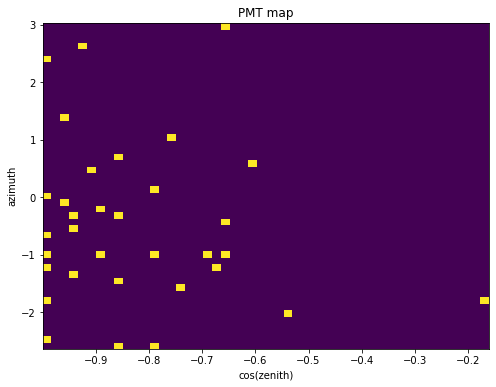

In [15]:
#%matplotlib

plt.figure(figsize=(8,6))
plt.hist2d(x = np.cos(zenit_1+pi/2), y = azimut_1, bins = [50,50], density = True)
plt.ylabel('azimuth')
plt.xlabel('cos(zenith)')
plt.title('PMT map')
#plt.colorbar()
plt.show()

### 3D Plot hit_types for this event

In [16]:
%matplotlib

#cev
x_hit_1 = array(hit_type_1_coord['x'])
y_hit_1 = array(hit_type_1_coord['y'])
z_hit_1 = array(hit_type_1_coord['z'])

#scint
x_hit_2 = array(hit_type_2_coord['x'])
y_hit_2 = array(hit_type_2_coord['y'])
z_hit_2 = array(hit_type_2_coord['z'])

#event generation
x_ev = vertex_coord[0]
y_ev = vertex_coord[1]
z_ev = vertex_coord[2]

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_hit_1, y_hit_1, z_hit_1, c = 'r', s = 10, label = 'CEV')
#ax.scatter(x_hit_2, y_hit_2, z_hit_2, c = 'b', s = 10, label = 'SCINT')
ax.scatter(x_ev, y_ev, z_ev, c = 'g', s = 10, label = 'VERTEX')
plt.legend()

plt.show()

Using matplotlib backend: Qt5Agg


### Lets see the xy plane

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(x_hit_1, y_hit_1)
plt.ylabel('y_pmt')
plt.xlabel('x_pmt')
#plt.title('PMT map')

plt.show()

In [18]:
plt.figure(figsize=(8,8))
plt.hist2d(x = x_hit_1, y = y_hit_1, bins = [20,20], density = True)
plt.ylabel('y_pmt')
plt.xlabel('x_pmt')
plt.title('Type1 Hit - xy plane')

#equal acis ration
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

### Study of cut in Time residual after selection of photon type

In [19]:
evt_id_n

,eventID,hitpmt ID,hit type,mc coordinates,mc radius,reconst radius,reconst error,time residual
0,11,"[2579, 8519, 8484, 8966, 8511, 8507, 8486, 897...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[3557.810791015625, -2256.099365234375, 3368.9...",5394.239748,5421.818817,48.522873,"[-10318.78351583185, 0.693626196607795, 4.4544..."


In [20]:
time_res = np.array(evt_id_n['time residual'])[0]
hitpmt_ID = np.array(evt_id_n['hitpmt ID'])[0]

In [22]:
time_res_cut = np.array([])
hitpmt_ID_cut = np.array([], dtype = np.int64)  # ID´s after cut

#cuts
up_cut = 5
inf_cut = -50

#conditions
condition_1 = time_res_hit_1 > inf_cut
condition_2 = time_res_hit_1 < up_cut

for i in np.where((time_res_hit_1 > inf_cut) & (time_res_hit_1 < up_cut))[0]:
    
    time_res_cut = np.append(time_res_cut, time_res_hit_1[i])
    hitpmt_ID_cut = np.append(hitpmt_ID_cut, hitpmt_ID_hit_1[i])
type(time_res_hit_1)

numpy.ndarray

In [206]:
GetPMTCoord(file, hitpmt_ID_cut)

,x,y,z,zenit,azimut,rad
0,6576.25,1326.20,5080.24,0.922660,0.198996,8415.147590
1,-5529.81,587.34,6311.97,0.722224,3.035776,8412.177613
2,1828.68,-7662.79,-2993.56,1.933936,-1.336534,8427.563266
3,3222.91,-4871.25,6020.09,0.770293,-0.986297,8387.950229
4,3436.46,-5607.91,5233.65,0.898658,-1.021027,8405.296201
5,3777.41,-6499.82,3808.92,1.101837,-1.044348,8427.595025
6,4353.29,-7113.34,1018.18,1.449309,-1.021608,8401.632597
7,8363.38,40.02,-799.72,1.666127,0.004785,8401.623575
8,6668.21,-5089.93,-551.53,1.636448,-0.651967,8406.937454
9,7415.27,-1249.69,3770.62,1.106011,-0.166960,8412.225000


In [207]:
cut_pmt = GetPMTCoord(file,hitpmt_ID_cut)

In [208]:
%matplotlib

#cev
x_hit_1 = array(cut_pmt['x'])
y_hit_1 = array(cut_pmt['y'])
z_hit_1 = array(cut_pmt['z'])

#event generation
x_ev = vertex_coord[0]
y_ev = vertex_coord[1]
z_ev = vertex_coord[2]


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_hit_1, y_hit_1, z_hit_1, c = 'r', s = 15, label = 'CEV')
#ax.scatter(x_hit_2, y_hit_2, z_hit_2, c = 'b', s = 10, label = 'SCINT')
ax.scatter(x_ev, y_ev, z_ev, c = 'g', s = 10, label = 'VERTEX')
plt.legend()

ax.axes.set_xlim3d(left=-9000, right=9000) 
ax.axes.set_ylim3d(bottom=-9000, top=9000) 
ax.axes.set_zlim3d(bottom=-9000, top=9000) 

plt.show()

Using matplotlib backend: Qt5Agg


In [183]:
plt.figure(figsize=(8,8))
plt.hist2d(x = x_hit_1, y = y_hit_1, bins = [20,20], density = True)
plt.ylabel('y_pmt')
plt.xlabel('x_pmt')
plt.title('PMT map')


# ax = plt.gca()
# ax.set_aspect('equal', adjustable='box')
plt.show()